In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import glob
import numpy.ma as ma
from matplotlib import gridspec

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# import the MIMOC MLD data

files = glob.glob('../data/mimoc/MIMOC_ML_v2.2_PT_S/*.nc')

mld = np.zeros((341, 720, 12))

for m in range(12):
    mimoc = Dataset(files[m], mode='r')
    mld[:,:,m]= mimoc.variables['DEPTH_MIXED_LAYER'][:]
    lons = mimoc.variables['LONGITUDE'][:]
    lats = mimoc.variables['LATITUDE'][:]

lon, lat = np.meshgrid(lons, lats)

print np.shape(mld)

(341, 720, 12)


In [12]:
# make a timeseries of mean mld over the study region

mld_kuro = np.zeros(12)
mld_std = np.zeros(12)

x,y = np.where((lon>=140) & (lon<=170) & (lat>=35) & (lat<=45))


for m in range(12):
    tmp = mld[x,y,m]
    mld_kuro[m] = np.nanmean(tmp)
    mld_std[m] = np.nanstd(tmp)

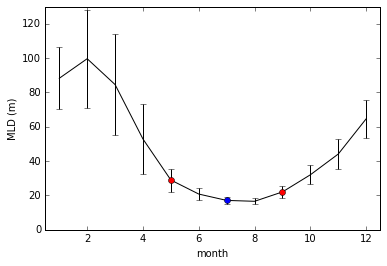

In [16]:
plt.errorbar(np.arange(1,13,1), mld_kuro, yerr=mld_std, color='k')
plt.plot(5, mld_kuro[4],'ro', 9, mld_kuro[8],'ro')
plt.plot(7, mld_kuro[6],'bo')
plt.axis([0.5, 12.5, 0, 130])
plt.xlabel('month')
plt.ylabel('MLD (m)')
plt.show()

In [18]:
print mld_kuro[4], mld_kuro[6],mld_kuro[8]
print mld_std[4], mld_std[6],mld_std[8]


 28.9811183956 17.1176507398 22.0673441017
6.6858792693 2.23562396033 3.31642759604


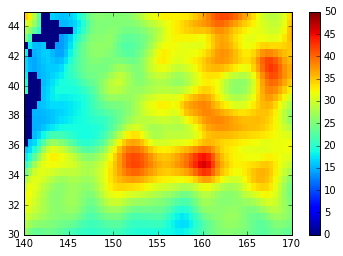

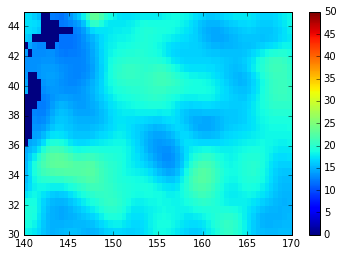

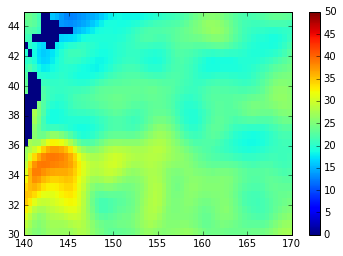

In [7]:
plt.pcolor(lon,lat,mld[:,:,4], vmin=0, vmax=50)
plt.axis([140, 170, 30, 45])
plt.colorbar()
plt.show()

plt.pcolor(lon,lat,mld[:,:,6], vmin=0, vmax=50)
plt.axis([140, 170, 30, 45])
plt.colorbar()
plt.show()

plt.pcolor(lon,lat,mld[:,:,8], vmin=0, vmax=50)
plt.axis([140, 170, 30, 45])
plt.colorbar()
plt.show()